Data Exploration

In [81]:
import pandas as pd
import numpy as np
import nltk
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [44]:

train_df = pd.read_csv("training_text", sep="\|\|", engine='python', header=None, skiprows=1, names=["ID","Text"])
test_df = pd.read_csv("test_text", sep="\|\|", engine='python', header=None, skiprows=1, names=["ID","Text"])


In [49]:
train = pd.read_csv('training_variants')
test  = pd.read_csv('test_variants')

train = pd.merge(train, train_df, how = 'left', on = 'ID').fillna('')
test = pd.merge(test, test_df, how = 'left', on = 'ID').fillna('')

In [40]:
train_df.head()

,ID,Text
0,0,Cyclin-dependent kinases (CDKs) regulate a var...
1,1,Abstract Background Non-small cell lung canc...
2,2,Abstract Background Non-small cell lung canc...
3,3,Recent evidence has demonstrated that acquired...
4,4,Oncogenic mutations in the monomeric Casitas B...


In [50]:
train.head()

,ID,Gene,Variation,Class,Text
0,0,FAM58A,Truncating Mutations,1,Cyclin-dependent kinases (CDKs) regulate a var...
1,1,CBL,W802*,2,Abstract Background Non-small cell lung canc...
2,2,CBL,Q249E,2,Abstract Background Non-small cell lung canc...
3,3,CBL,N454D,3,Recent evidence has demonstrated that acquired...
4,4,CBL,L399V,4,Oncogenic mutations in the monomeric Casitas B...


In [74]:
test_df.head()

,ID,Text
0,0,2. This mutation resulted in a myeloproliferat...
1,1,Abstract The Large Tumor Suppressor 1 (LATS1)...
2,2,Vascular endothelial growth factor receptor (V...
3,3,Inflammatory myofibroblastic tumor (IMT) is a ...
4,4,Abstract Retinoblastoma is a pediatric retina...


In [78]:
train['text_length']  = train['Text'].apply(len)
test['text_length'] = test['Text'].apply(len)

In [146]:
train.head()

,ID,Gene,Variation,Class,Text,text_length
0,0,FAM58A,Truncating Mutations,1,Cyclin-dependent kinases (CDKs) regulate a var...,39672
1,1,CBL,W802*,2,Abstract Background Non-small cell lung canc...,36691
2,2,CBL,Q249E,2,Abstract Background Non-small cell lung canc...,36691
3,3,CBL,N454D,3,Recent evidence has demonstrated that acquired...,36238
4,4,CBL,L399V,4,Oncogenic mutations in the monomeric Casitas B...,41308


In [150]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3321 entries, 0 to 3320
Data columns (total 6 columns):
ID             3321 non-null int64
Gene           3321 non-null object
Variation      3321 non-null object
Class          3321 non-null int64
Text           3321 non-null object
text_length    3321 non-null int64
dtypes: int64(3), object(3)
memory usage: 341.6+ KB


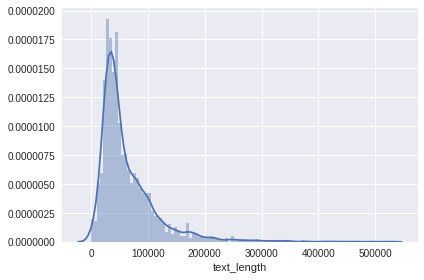

In [140]:
sns.distplot(train['text_length'],bins=100)
plt.tight_layout()

In [ ]:
train.groupby('Gene')

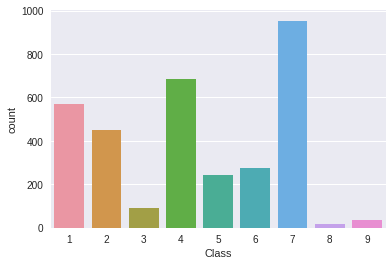

In [182]:
sns.countplot(train['Class'])
plt.figure(figsize=(12,8))

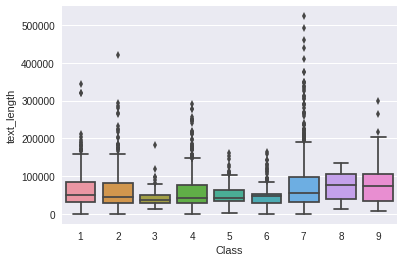

In [183]:
sns.boxplot(x='Class',y='text_length',data=train)
plt.figure(figsize=(12,8))

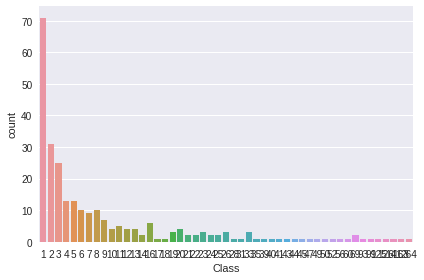

In [188]:

sns.countplot(train.groupby('Gene').count()['Class'])
plt.tight_layout(w_pad=True)


In [227]:
import re


re.sub('[bp]',' ',train['Gene'][10])

'CBL'

In [231]:
train['Text'][10]

'Oncogenic mutations in the monomeric Casitas B-lineage lymphoma (Cbl) gene have been found in many tumors, but their significance remains largely unknown. Several human c-Cbl (CBL) structures have recently been solved depicting the protein at different stages of its activation cycle and thus provide mechanistic insight underlying how stability-activity tradeoffs in cancer-related proteins may influence disease onset and progression. In this study, we computationally modeled the effects of missense cancer mutations on structures representing four stages of the CBL activation cycle to identify driver mutations that affect CBL stability, binding, and activity. We found that recurrent, homozygous, and leukemia-specific mutations had greater destabilizing effects on CBL states than did random non-cancer mutations. We further tested the ability of these computational models assessing the changes in CBL stability and its binding to ubiquitin conjugating enzyme E2, by performing blind CBL-med

In [144]:
train['Variation'].describe()

count                     3321
unique                    2996
top       Truncating Mutations
freq                        93
Name: Variation, dtype: object

In [102]:
k

[('F', 'NNP'),
 ('o', 'MD'),
 ('r', 'VB'),
 (' ', 'NNP'),
 ('t', 'NN'),
 ('h', 'NN'),
 ('o', 'JJ'),
 ('s', 'NN'),
 ('e', 'NN'),
 (' ', 'NNP'),
 ('o', 'VBZ'),
 ('f', 'JJ'),
 (' ', 'NNP'),
 ('y', 'NN'),
 ('o', 'NN'),
 ('u', 'JJ'),
 (' ', 'NNP'),
 ('w', 'NN'),
 ('h', 'NN'),
 ('o', 'JJ'),
 (' ', 'NNP'),
 ('h', 'NN'),
 ('a', 'DT'),
 ('v', 'NN'),
 ('e', 'NN'),
 (' ', 'NNP'),
 ('e', 'NN'),
 ('n', 'RB'),
 ('d', 'JJ'),
 ('u', 'JJ'),
 ('r', 'NN'),
 ('e', 'NN'),
 ('d', 'NN'),
 (' ', 'NNP'),
 ('t', 'NN'),
 ('h', 'NN'),
 ('e', 'NN'),
 (' ', 'NNP'),
 ('e', 'NN'),
 ('n', 'IN'),
 ('t', 'NN'),
 ('i', 'NN'),
 ('r', 'VBP'),
 ('e', 'NN'),
 (' ', 'NN'),
 ('b', 'NN'),
 ('l', 'NN'),
 ('o', 'NN'),
 ('g', 'NN'),
 (' ', 'NNP'),
 ('p', 'NN'),
 ('o', 'NN'),
 ('s', 'NN'),
 ('t', 'NN'),
 (' ', 'NNP'),
 ('u', 'JJ'),
 ('p', 'NN'),
 (' ', 'NNP'),
 ('t', 'NN'),
 ('o', 'NN'),
 (' ', 'NNP'),
 ('t', 'NN'),
 ('h', 'NN'),
 ('i', 'JJ'),
 ('s', 'VBP'),
 (' ', 'JJ'),
 ('p', 'NN'),
 ('o', 'NN'),
 ('i', 'NN'),
 ('n', 'VBP'),
 ('

In [71]:
nltk.sent_tokenize(a)[1]

'It uses our newly minted cairo context manager to recursively draw a fractal tree.'

In [85]:
k=nltk.pos_tag(a)

In [88]:
if hasattr

AttributeError: module 'nltk' has no attribute 'batch_ne_chunk'